In [93]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Problem 2

## A dataset collected in a cosmetics shop showing details of customers and whether or not they responded to a special offer to buy a new lipstick is shown in the table below. Use this dataset to build a decision tree, with Buys as the target variable, to help in buying lip-sticks in the future. Find the root node of the decision tree. According to the decision tree, you have made from the previous Training data set, what is the decision for the 
## test data: [Age < 21, Income = Low, Gender = Female, Marital Status = Married]? 
## Write the concluding statement for the implemented application.


In [53]:
df = pd.read_csv ("data3.csv")

In [54]:
df.head(10)

,ID,Age,Income,Gender,Marital Status,Buys
0,1,<21,High,Male,Single,No
1,2,<21,High,Male,Maried,No
2,3,21-35,High,Male,Single,Yes
3,4,>35,Medium,Male,Single,Yes
4,5,>35,Low,Female,Single,Yes
5,6,>35,Low,Female,Maried,No
6,7,21-35,Low,Female,Maried,Yes
7,8,<21,Medium,Male,Single,No
8,9,<21,Low,Female,Maried,Yes
9,10,>35,Medium,Female,Single,Yes


In [109]:
df

,Age,Income,Gender,Marital Status,Buys
0,<21,High,Male,Single,No
1,<21,High,Male,Maried,No
2,21-35,High,Male,Single,Yes
3,>35,Medium,Male,Single,Yes
4,>35,Low,Female,Single,Yes
5,>35,Low,Female,Maried,No
6,21-35,Low,Female,Maried,Yes
7,<21,Medium,Male,Single,No
8,<21,Low,Female,Maried,Yes
9,>35,Medium,Female,Single,Yes


In [110]:
df.describe()

,Age,Income,Gender,Marital Status,Buys
count,14,14,14,14,14
unique,3,3,2,2,2
top,<21,Medium,Male,Single,Yes
freq,5,6,7,7,9


In [111]:
df['Buys'].value_counts()


Yes    9
No     5
Name: Buys, dtype: int64

In [112]:
df.shape

(14, 5)

<AxesSubplot:xlabel='Buys', ylabel='count'>

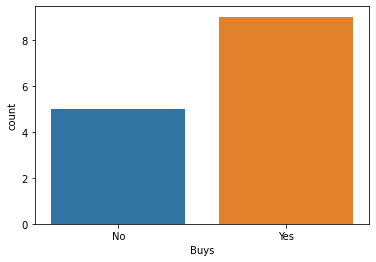

In [114]:
sns.countplot(data=df,x='Buys')

In [115]:
from sklearn.preprocessing  import LabelEncoder
l = LabelEncoder();
x = df.iloc[:,:-1]
x=x.apply(l.fit_transform)

In [116]:
print("age with en value ", list(zip(df.iloc[:,0],x.iloc[:,0])))

age with en value  [('<21', 1), ('<21', 1), ('21-35', 0), ('>35', 2), ('>35', 2), ('>35', 2), ('21-35', 0), ('<21', 1), ('<21', 1), ('>35', 2), ('<21', 1), ('21-35', 0), ('21-35', 0), ('>35', 2)]


In [117]:
print("income with en value ", list(zip(df.iloc[:,1],x.iloc[:,1])))

income with en value  [('High', 0), ('High', 0), ('High', 0), ('Medium', 2), ('Low', 1), ('Low', 1), ('Low', 1), ('Medium', 2), ('Low', 1), ('Medium', 2), ('Medium', 2), ('Medium', 2), ('High', 0), ('Medium', 2)]


In [118]:
print("Gender with en value ", list(zip(df.iloc[:,2],x.iloc[:,2])))

Gender with en value  [('Male', 1), ('Male', 1), ('Male', 1), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Female', 0), ('Female', 0), ('Male', 1), ('Female', 0), ('Male', 1)]


In [119]:
print("Maritail status with en value ", list(zip(df.iloc[:,3],x.iloc[:,3])))

Maritail status with en value  [('Single', 1), ('Maried', 0), ('Single', 1), ('Single', 1), ('Single', 1), ('Maried', 0), ('Maried', 0), ('Single', 1), ('Maried', 0), ('Single', 1), ('Maried', 0), ('Maried', 0), ('Single', 1), ('Maried', 0)]


In [120]:
y = df.iloc[:,-1]

In [121]:
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Buys, dtype: object

In [122]:
x

,Age,Income,Gender,Marital Status
0,1,0,1,1
1,1,0,1,0
2,0,0,1,1
3,2,2,1,1
4,2,1,0,1
5,2,1,0,0
6,0,1,0,0
7,1,2,1,1
8,1,1,0,0
9,2,2,0,1


In [123]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier (criterion = 'entropy')
classifier.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

In [127]:
test= np.array([1,1,0,0])
pred_y = classifier.predict ([test])
print("predicted class for given question",test,"is",pred_y[0])

predicted class for given question [1 1 0 0] is Yes


D:\huawei\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


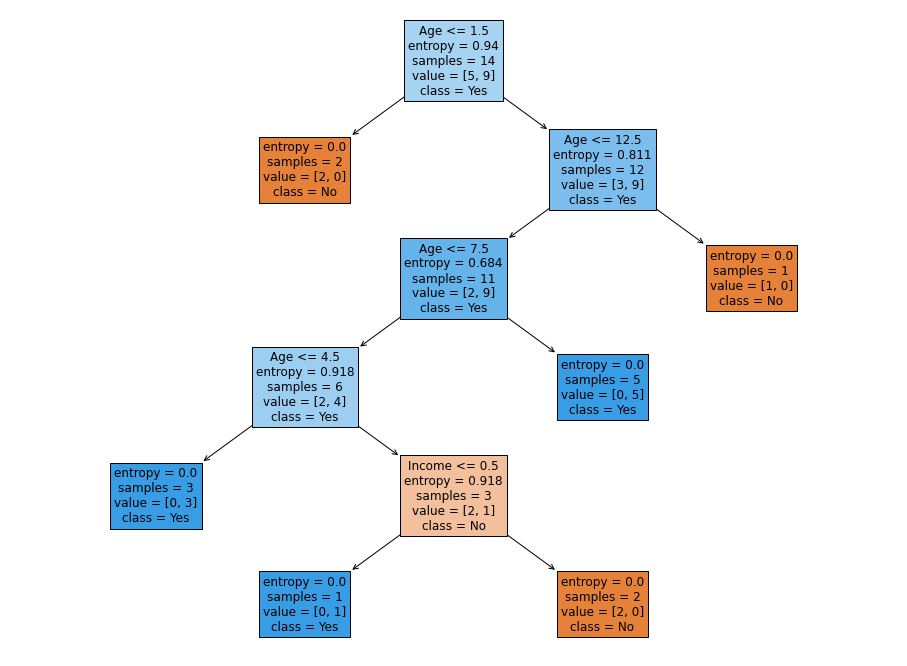

In [94]:
from sklearn.tree import plot_tree 
fig = plt.figure(figsize = (16,12))
a= plot_tree (classifier, feature_names = df.columns , fontsize = 12, filled = True, class_names=['No','Yes'])